# Data Analysis and Data Science
## Putting it all together

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 7th 2022

<hr style="border:1px solid black"> </hr>


Name: Nitya Khetarpal

In [1]:
import random
import os
### Import sklearn
import sklearn.decomposition
import sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Data Analysis II: k-means for clustering datapoints

In [ ]:
### Import and clean the penguins dataset
data_penguin = pd.read_csv("/u/khetarpn/BIM6065C/ds1/palmer_penguins.csv", sep=",", header=0)
data_penguin.dropna(axis="index", inplace=True)
data_penguin = data_penguin.reset_index(drop=True)

In [ ]:
### Do dimensionality reduction through PCA
X = data_penguin.iloc[:, 2:6]

# Data scaling
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) 

# Initiate the PCA and apply it to the scaled data
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(X_scaled)

# Apply the dimensionality reduction to our data
X_reduce = pca.fit_transform(X_scaled)

reduce_penguin = pd.DataFrame(X_reduce)
reduce_penguin["species"] = data_penguin.species
reduce_penguin["island"] = data_penguin.island
reduce_penguin["sex"] = data_penguin.sex

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.scatterplot(data=data_penguin, x="flipper_length_mm", y="body_mass_g", hue="species", ax=ax[0])
ax[0].set_title("Comparing two measurements")

sns.scatterplot(data=reduce_penguin, x=0, y=1, hue="species", ax=ax[1])
ax[1].set_title("Comparing two PCs")

plt.tight_layout()
plt.show()

We wish to group similar samples and compare the groups to catagorical labels.

### k-means with scikit-learn

The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as **within-cluster sum-of-squares**.

This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

At a glance, the k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_{j}$ of the samples in the cluster $C_{j}$. 

*In very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.*
(or if scaling very different)

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

* *the downside of kmeans clustering is that we need to define the clusters BEFOREHAND: not always easy to do!* but do using exptl context 
* first it defines centroids (in 2D C1=(x,y2) since we have k=3), average distances away, then i iterations or until distance between last and new position of centroid is under a threshold (i.e. centroid not move)
* Each centroid has a defined cluster.
* **Circular approach**: probably Gentoo but hard to discriminate between S,C

Let's apply the k-means algorithm to the first two principal component of the Iris dataset. **Are we able to cluster pengouins based on the species?

In [ ]:
### Define the data
P = data_penguin.loc[:, ["flipper_length_mm", "body_mass_g"]]
P.head()


In [ ]:
P = data_penguin.iloc[:,2:6]
P.head()

In [ ]:
len(P)

In [ ]:
random.seed(0) #do not rerun this!!

In [ ]:
### Initiate the k-means algorithm
### How many cluster should we use?
K = 3
kmean = sklearn.cluster.KMeans(n_clusters=K)
kmean #empty object with 3 centroids, we want to apply this to our dataset now

In [ ]:
### Apply kmeans to our data
kmeans_P = kmean.fit(P)

**Attributes of the kmeans object:**

<code>kmeans.cluster_centers_</code>: coordinates of cluster centers

<code>kmeans.labels_</code>: labels of each point

In [ ]:
### Get centroids coordinate
kmeans_P.cluster_centers_

* If you rerun, might not be the same order of clusters because the order of clusters is not dependent  

In [ ]:
### Get datapoints labels
kmeans_P.labels_

In [ ]:
### Add the cluster column
data_penguin.loc[:,"cluster"] = kmeans_P.labels_

In [ ]:
### Plot the cluster and the labels
#sns.scatterplot(data=data_penguin, x="flipper_length_mm", y="body_mass_g", hue="species", style="cluster")
sns.despine() #circular, also uninformative: scale diff so y wt>x. 
#if we add more dimensions, it look the same (took)
sns.scatterplot(data=data_penguin, x="bill_length_mm", y="bill_depth_mm", hue="cluster", style="species")

In [ ]:
sns.pairplot(data=data_penguin, hue="cluster") #no great clusters tbh, can look at another dataset

In [ ]:
### Instead of using measurements values, cluster penguins based on the result of the dimensionality reduction


In [ ]:
#rpeng = reduce_penguin
#kmeans_rpeng = kmean.fit(rpeng)
#kmeans_rpeng.labels_
#kmeans_rpeng.labels_
#sns.pairplot(data=data_penguin, hue="cluster")

In [ ]:
X_reduce

It is not always easy to define the number of cluster to use!

The most common approach for deciding the value of $K$ is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

<code>inertia_</code>: sum of squared distances of samples to their closest cluster center

* Similar to variance ratio of PC

In [ ]:
### Get the inertia of our initial kmean
kmeans_P.inertia_ #for reduced, is 223.61240439194583

In [ ]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

X = reduce_penguin.iloc[:, 0:2]

### Create for loop for K from 1 to 10
for k in range(1, 11) :
    kmean = sklearn.cluster.KMeans(n_clusters=k)
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_] #FYI c+=1 is equivalent to c=c+1, can append faster (works for +,-,*)
    
### Plot K vs. inertia
plt.figure(figsize=(10, 4))
sns.lineplot(x=np.arange(1, 11), y=inertia_list)
sns.scatterplot(x=np.arange(1, 11), y=inertia_list)

plt.title("Elbow plot")
plt.xlabel("Nb of clusters")
plt.ylabel("Intertia")

sns.despine()

## Data Analysis III: Putting it all together!

You are given a dataset of gene experissions for $N$ samples. Each sample represent a breast cancer patient. 
The dataset comprises two TSV files:
* `patient_expression.tsv`: contains the expressions of $M$ genes for each of the `N` patients;
* `patient_subtype.tsv`: contains the clinical classification of each patient;

The order is the same for all files.

You wonder if you can cluster patient, from their expression profile, by clinical classification.
** The expression values are already log-transformed

### Create a dataframe of the data

In [3]:
expn = "/u/khetarpn/BIM6065C/datasets/breast_cancer_expression.tsv"
subtype = "/u/khetarpn/BIM6065C/datasets/breast_cancer_subtype.tsv"

bce = pd.read_table(expn, sep="\t",header=0)
bce

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


In [4]:
bce.describe()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,...,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,2.164062,1.535686,2.102870,3.132112,1.179845,2.554557,2.491631,2.452480,1.803410,3.506780,...,2.057766,2.501976,2.179967,1.559163,3.388674,2.488361,2.191050,2.160046,1.501528,0.772357
std,0.781086,1.254415,1.246204,0.744226,1.332091,0.854562,1.798359,1.145830,0.715625,1.197679,...,0.977252,0.762971,0.878594,0.655027,0.949751,0.703128,1.899352,1.878563,1.115846,1.152220
min,0.341260,0.099710,0.032024,0.935173,0.001169,0.344030,0.015724,0.242520,0.376927,0.416389,...,0.167551,0.311897,0.206093,0.122272,0.671586,0.821945,0.000000,0.000000,0.011289,0.000000
25%,1.639594,0.582533,1.001653,2.611508,0.097828,1.921563,0.493092,1.562656,1.339387,2.673897,...,1.205265,2.027378,1.507153,1.081397,2.706405,1.979295,0.630803,0.631970,0.387702,0.063929
50%,2.194305,0.923892,1.929366,3.225857,0.427840,2.642473,2.847615,2.395766,1.797986,3.620524,...,2.053634,2.542759,2.342684,1.571239,3.546343,2.477217,1.717262,1.864735,1.380846,0.158128
75%,2.708324,2.532103,3.144786,3.690055,2.277659,3.177790,4.140374,3.297016,2.202655,4.460436,...,2.868602,3.025654,2.864083,2.026489,4.091162,2.934627,3.409586,2.945522,2.507121,1.151365
max,4.472493,5.153899,5.090996,5.211346,5.795794,5.387572,5.622833,7.033342,4.864568,6.161285,...,4.501158,4.904543,4.276689,3.053063,5.919182,4.703090,8.310010,8.813403,4.202284,5.151801


In [5]:
bcs = pd.read_table(subtype, sep="\t", header=None)

bcs.set_axis(["subtype"],axis=1,inplace=True)
bcs.head()

bcs

,subtype
0,Basal
1,Basal
2,Basal
3,Basal
4,Basal
...,...
640,Normal
641,Normal
642,Normal
643,Normal


In [6]:
bcs.describe()

,subtype
count,645
unique,5
top,Basal
freq,191


In [7]:
patient_data = pd.concat([bce, bcs], axis=1)
patient_data

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,subtype
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799,Normal
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657,Normal
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375,Normal
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823,Normal


In [ ]:
sns.pairplot(data=patient_data, hue="subtype", corner=True)

### Explore the data [35 points]

<hr>

#### Part 1 [15 points]
Answer the following questions:
1. How many patients are you considering?
2. How many genes are you considering?
3. Is there a pair of genes that seems to be linearly correlated? If yes, which genes and what is the correlation coefficient?

In [ ]:
print(
"1. How many patients:",len(patient_data), '\n',"2. How many genes:", bce.shape[1],'\n',"3. See linreg below: it shows gene x,y and rvalue")

In [8]:
gene_x = patient_data.loc[:,"ENSG00000117399.12"]
gene_y = patient_data.loc[:,"ENSG00000142945.11"]
linreg = sp.stats.linregress(x=gene_x, y=gene_y) #expect rvalue~0.92
print(gene_x,gene_y,'\n',linreg)

0      4.026396
1      4.176842
2      4.304707
3      4.511984
4      2.636100
         ...   
640    1.576965
641    3.622115
642    1.270365
643    2.579744
644    2.793952
Name: ENSG00000117399.12, Length: 645, dtype: float64 0      2.753857
1      2.781061
2      3.177277
3      3.384669
4      2.755696
         ...   
640    0.894948
641    1.917527
642    0.829422
643    1.232867
644    2.323770
Name: ENSG00000142945.11, Length: 645, dtype: float64 
 LinregressResult(slope=0.7492199653269142, intercept=-0.04137755917092045, rvalue=0.9176074418537264, pvalue=7.945404854815358e-260, stderr=0.0127988448729231, intercept_stderr=0.03993642857636648)


<hr>

#### Part 2 [20 points]
Visually inspect your dataset by generating at least two (2) graphs. For each visualisation you should:
* State what you are exploring;
* Plot comprehensive graphs (title, axis-labels, legend if necesssary);
* Give a consise interpretation of the results.

In [ ]:
print("In Part 1, I show a pairplot that visualizes the pairwise relationships in the dataset coloured by subtype. From this I can select genes to investigate further (e.g. by linreg as shown above).")

In [ ]:
sns.histplot(data=patient_data) #stacked histogram of each gene's expression value by count
plt.title("Stacked histogram of patient log10-transformed expression value counts for each gene")
plt.xlabel("log10(expression)")
#honestly kind of useless, would be better to show gene expression levels in a heatmap (and make in panels by subtype in 1 figure) 

In [ ]:
print("The above plot shows a stacked histogram of the counts of the log10-transformed expression values for all of the 47 genes tested across all patients. We see that the majority of them are not very highly expressed.")

In [ ]:
sns.scatterplot(data=patient_data,x=gene_x, y=gene_y,hue="subtype").set(title="Selected gene x vs y log10-transformed expression per patient coloured by subtype")

In [ ]:
print("The above scatter plot shows the selected 2 genes' expression values plotted per patient by subtype. There is no clear association between expression and subtype, though the data appear to suggest a linear correlation (which was tested above, as well).")

<hr style="border:1px solid black"> </hr>

### Analyse the data [60 points]

You are wondering if it would be possible to group patients in various subsets. 

<hr>

#### Part 1 [20 points]

Using the methods presented in previous class, are you able to group patients in various subsets?

Make sure that each step of your analysis is clearly identifiable. When you make decision regarding algorithm parameters, make sure to justify them with a short sentence and a plot (if applicable).

For each results generated, give a concise interpretation.

In [ ]:
#DELETE THIS COMMENT BEFORE SUBMITTING, IS JUST DUMB THOUGHTS
#to group patients by subset, do PCA (to reduce dimensions, only 5 here so low but still that is difficult to visualize) then kmeans clustering (since on what 3 PCs that you'll keep?? you will lose some info re: data features but it should be sufficient to cluster since we expect differences by bcs; again, kmeans will be k=5 (expect 5 centroids): then need to plot each centroid as subplots in a scatter (relpot?displot?) and colour by subtype)

In [9]:
X = patient_data.iloc[:,:47]
print(X.shape)

(645, 47)


In [10]:
### Do dimensionality reduction through PCA
X = patient_data.iloc[:,:47]

# Data scaling
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) 

# Initiate the PCA and apply it to the scaled data
pca = sklearn.decomposition.PCA(n_components=5) #we have 5 unique breast cancer subtypes
pca.fit(X_scaled)

# Apply the dimensionality reduction to our data
X_reduce = pca.fit_transform(X_scaled)

reduce_patient_data = pd.DataFrame(X_reduce)
reduce_patient_data["subtype"] = patient_data.subtype

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.scatterplot(data=patient_data, ax=ax[0])
ax[0].set_title("Comparing two measurements")

sns.scatterplot(data=reduce_patient_data, x=0, y=1, hue="subtype", ax=ax[1])
ax[1].set_title("Comparing two PCs")

plt.tight_layout()
plt.show()

In [ ]:
print("the dimensionality reduction scatter plot is easier to interpret than the raw expression (we see some groups emerge as we apply PCA to reduce dimensions by maximizing variance, though we lose some data features), but can be made more clear by performing clustering, as I proceeded with below.")

In [ ]:
#run kmeans on dataset

In [11]:
### Define the data
P = patient_data.iloc[:,:47]
P.head()


,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927


In [12]:
len(P)

645

In [13]:
random.seed(0) #do not rerun this!!

In [14]:
### Initiate the k-means algorithm
### How many cluster should we use?
K = 5
kmean = sklearn.cluster.KMeans(n_clusters=K)
kmean #empty object with K centroids, we want to apply this to our dataset now

KMeans(n_clusters=5)

In [15]:
### Apply kmeans to our data
kmeans_P = kmean.fit(P)

In [16]:
### Get centroids coordinate (coordinates of cluster centers)
kmeans_P.cluster_centers_

array([[2.32235747, 0.70129773, 1.45819975, 3.53160225, 1.50751448,
        2.9628707 , 3.86749206, 2.04271789, 2.13691083, 3.83842026,
        3.36930247, 0.9820731 , 1.2163369 , 3.84843506, 2.492057  ,
        3.78078708, 3.10922178, 2.68295696, 1.44955542, 4.57980763,
        0.93990385, 3.44771689, 2.30442906, 3.262484  , 2.40350615,
        5.73985783, 3.62884308, 2.25964905, 2.38746   , 0.65587551,
        2.50845007, 1.26290262, 1.13795301, 2.81614937, 2.28582611,
        3.11858303, 3.63403309, 2.38902431, 2.83174105, 2.64228424,
        1.76348473, 3.81848325, 2.70003   , 1.12676595, 1.28305493,
        1.95682747, 0.11609157],
       [2.75910044, 3.27365992, 3.37047454, 3.53049586, 0.12939637,
        3.16946017, 0.47004937, 3.59464447, 1.99200603, 2.9966028 ,
        3.68971097, 4.32556676, 2.25507979, 2.91316203, 2.28307694,
        0.95262293, 3.88841152, 2.92227447, 4.39892131, 0.90522026,
        1.65229872, 3.40629028, 1.80391649, 3.97676579, 2.72662403,
        3.56432

In [17]:
### Get datapoints labels
kmeans_P.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [22]:
patient_data.head()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,subtype,cluster
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal,1
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal,1
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal,1
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal,1
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal,1


In [19]:
### Add the cluster column
patient_data.loc[:,"cluster"] = kmeans_P.labels_

In [21]:
patient_data.head()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,subtype,cluster
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal,1
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal,1
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal,1
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal,1
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal,1


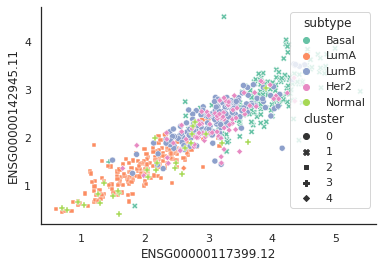

In [23]:
sns.scatterplot(data=patient_data, x=gene_x, y=gene_y, hue="subtype", style="cluster")
sns.despine() # scatterplot of the cluster and the labels

<AxesSubplot:>

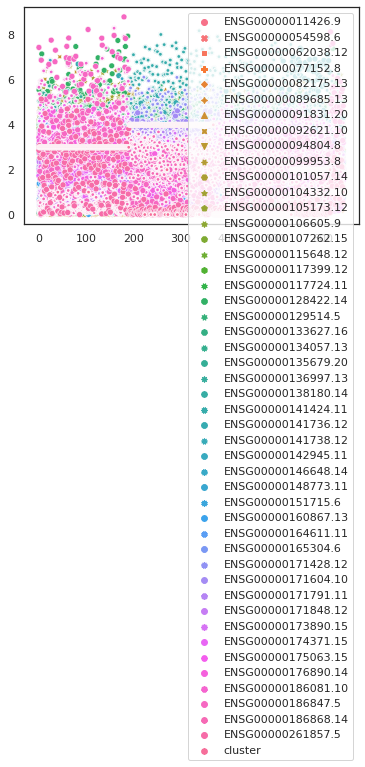

In [40]:
sns.scatterplot(data=patient_data)hue="cluster", style="subtype"

In [ ]:
sns.pairplot(data=patient_data, hue="cluster", corner=True)

In [ ]:
print("interpret pairplot above")

In [ ]:
#apply to reduced dataset

In [28]:
rpd = reduce_patient_data
rpd

,0,1,2,3,4,subtype
0,-5.445487,2.428327,0.994036,-3.231547,-0.592795,Basal
1,-5.413304,2.726570,-0.916807,-0.937455,1.995581,Basal
2,-8.407711,0.419349,-2.059313,0.793168,1.952151,Basal
3,-7.328171,0.176819,-0.737830,-2.308345,1.089786,Basal
4,-3.819484,2.102386,-2.357691,6.492014,0.153295,Basal
...,...,...,...,...,...,...
640,4.054981,6.227394,1.458488,-1.421434,-1.315116,Normal
641,-0.697819,2.007934,1.387839,-2.301193,-1.060456,Normal
642,3.859061,6.468149,2.007273,-1.026905,-0.897567,Normal
643,2.690803,3.915304,4.485286,-0.092714,-0.498048,Normal


In [30]:
kmeans_rpd = kmean.fit(rpd)
rpd.loc[:,"cluster"] = kmeans_rpd.labels_
rpd

/u/khetarpn/bioinfo/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: could not convert string to float: 'Basal'

In [27]:
rpd.loc[:,"cluster"] = kmeans_rpd.labels_
sns.pairplot(data=rpd, hue="cluster", corner=True)

/u/khetarpn/bioinfo/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: could not convert string to float: 'Basal'

In [24]:
#to check number of clusters
### Get the inertia of our initial kmean
kmeans_P.inertia_

15731.362485588079

In [ ]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

X = reduce_penguin.iloc[:, 0:2]

### Create for loop for K from 1 to 10
for k in range(1, 11) :
    kmean = sklearn.cluster.KMeans(n_clusters=k)
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_] #FYI c+=1 is equivalent to c=c+1, can append faster (works for +,-,*)
    
### Plot K vs. inertia
plt.figure(figsize=(10, 4))
sns.lineplot(x=np.arange(1, 11), y=inertia_list)
sns.scatterplot(x=np.arange(1, 11), y=inertia_list)

plt.title("Elbow plot")
plt.xlabel("Nb of clusters")
plt.ylabel("Intertia")

sns.despine()

Are you able to link each found cluster to a cancer subtype?

<hr>

#### Part 2

Go back the pair(s) of genes with high linear correlation. Do their expressions differ from one to subtype to another? If so, how?

<hr>

#### BONUS

For each cancer subtype, identify the most expressed gene (on average). Do you find a different gene for each cluster?

If you do a rapid literrature search, are there identified genes known to be link to their respective subtype?

<hr style="border:1px solid black"> </hr>

## Share your work

You are almost done!!

Once you are done with the exercices and are happy with your results, **push your Notebook to your GitHub account**.

Make sure that you've saved you Notebook before your final commit and push!

You last commit/push needs to be dated before **July 16th, 1:00 PM**.

Finally, **submit the URL to your GitHub account (https://github.com/HANDLE) to StudiUM.**

<hr style="border:1px solid black"> </hr>

# Good Job!

Yeah! You've just finish the last assignment for the Data Science & Data Analysis bloc of BIM6065: Congratulations 🎉

You guys did an amazing job over the last two weeks: you should be proud of yourselves!

I wish you the very best in your Master!